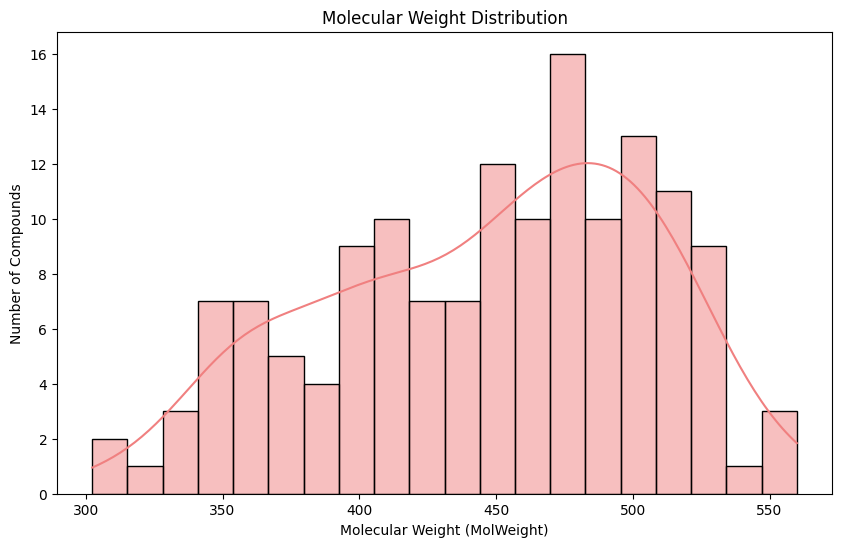

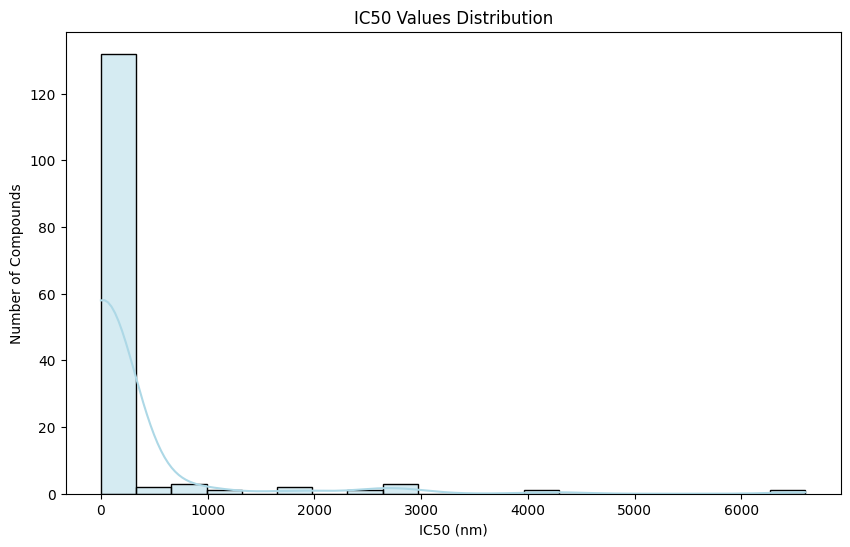

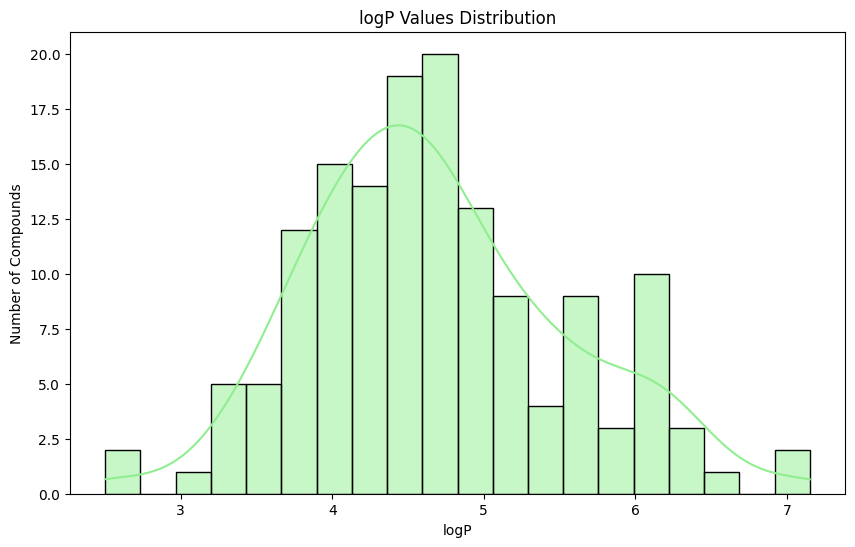

C:\Users\22524\AppData\Local\Temp\ipykernel_21216\1102837052.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HBA', palette='pastel')


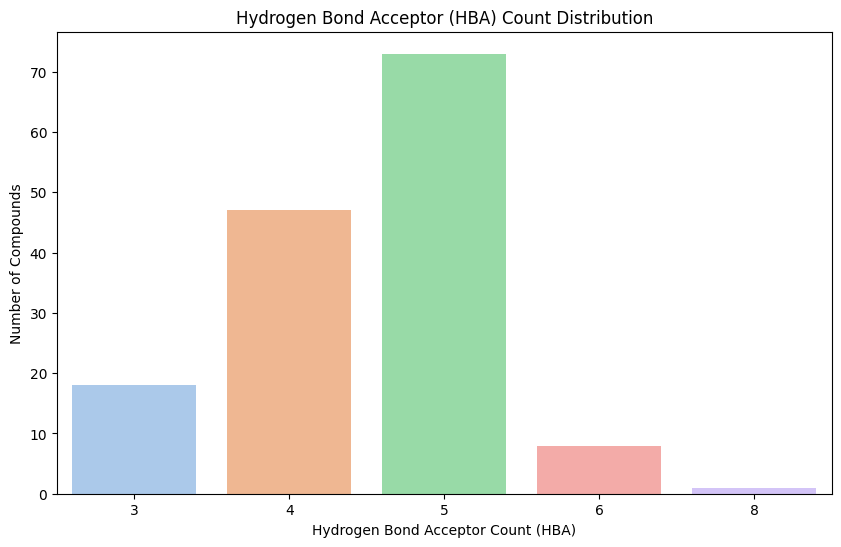

C:\Users\22524\AppData\Local\Temp\ipykernel_21216\1102837052.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HBD', palette='pastel')


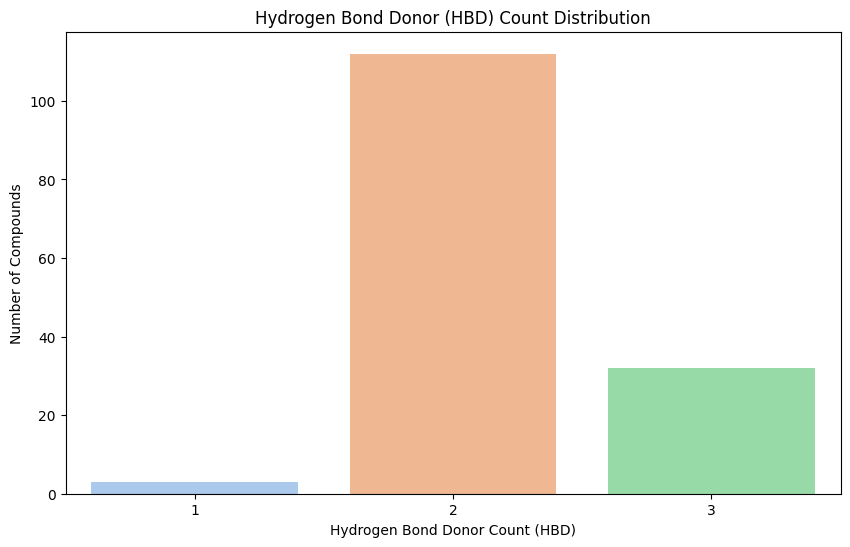

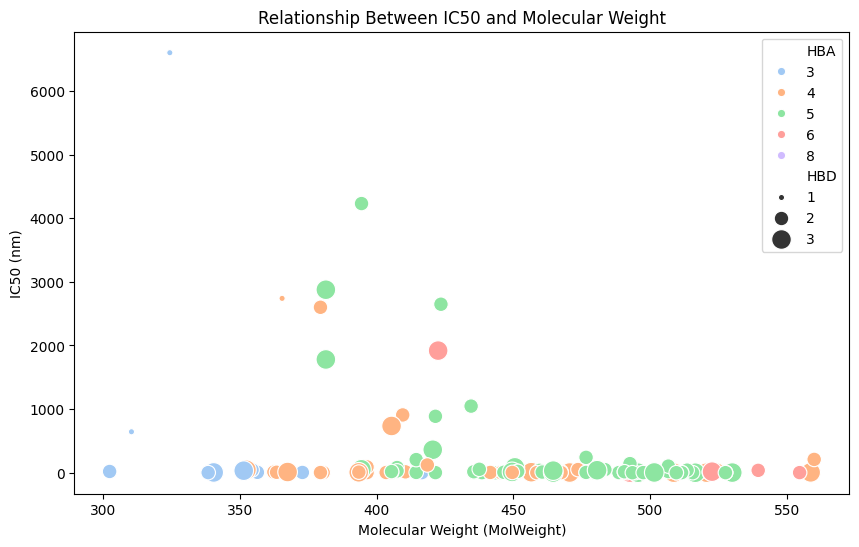

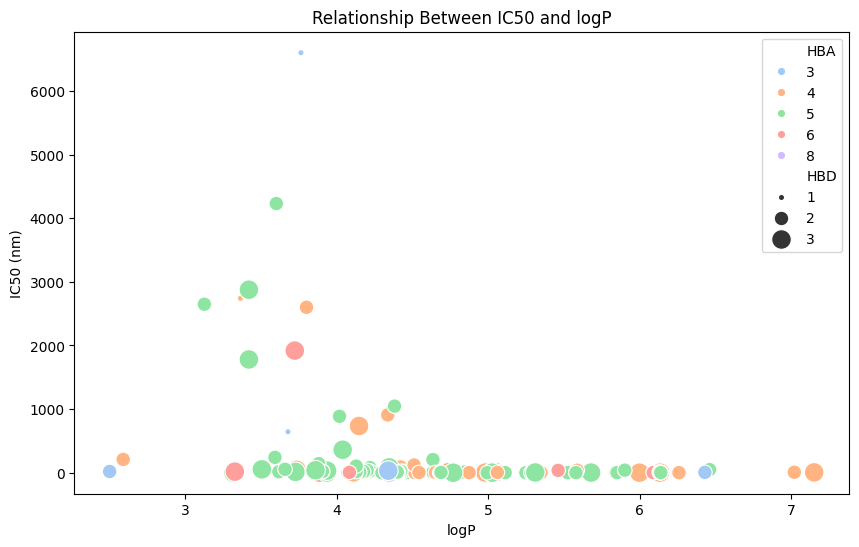

C:\Users\22524\AppData\Local\Temp\ipykernel_21216\1102837052.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HBA', y='ic50(nm)', palette='pastel')


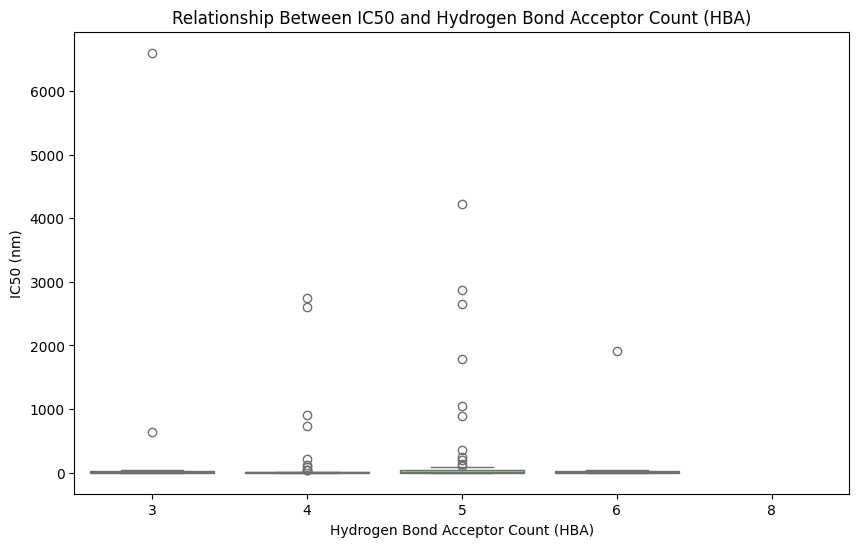

C:\Users\22524\AppData\Local\Temp\ipykernel_21216\1102837052.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HBD', y='ic50(nm)', palette='pastel')


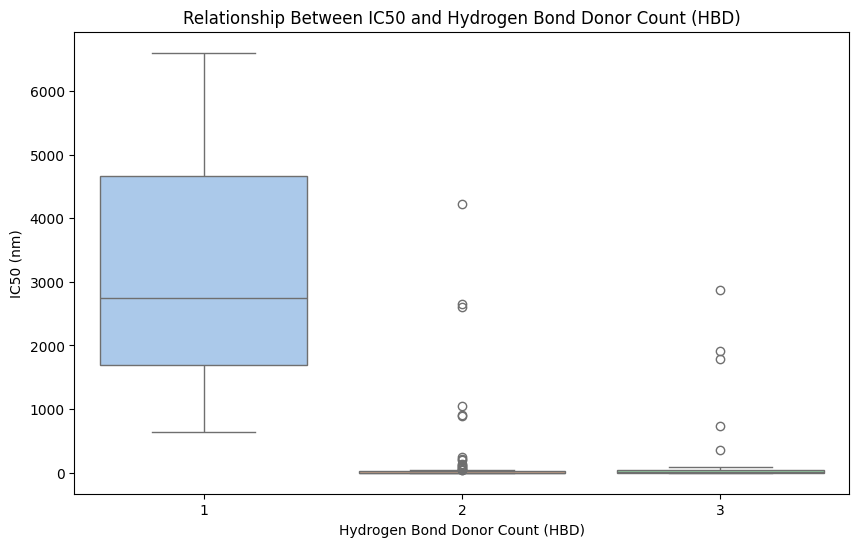

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Read the Excel file
df = pd.read_excel('table.xlsx')

# Define a function to calculate compound properties
def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol_weight = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hba = Lipinski.NumHAcceptors(mol)
        hbd = Lipinski.NumHDonors(mol)
        return mol_weight, logp, hba, hbd
    else:
        return None, None, None, None

# Calculate properties for each compound
df['MolWeight'], df['LogP'], df['HBA'], df['HBD'] = zip(*df['smiles'].apply(calculate_properties))

# Drop rows containing None
df.dropna(subset=['MolWeight', 'LogP', 'HBA', 'HBD'], inplace=True)

# Save the results to a new Excel file
df.to_excel('table_with_properties.xlsx', index=False)

# Analyze molecular weight distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MolWeight'], bins=20, kde=True, color='lightcoral')
plt.title('Molecular Weight Distribution')
plt.xlabel('Molecular Weight (MolWeight)')
plt.ylabel('Number of Compounds')
plt.savefig('MolWeight_distribution.png')
plt.show()

# Analyze IC50 values distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ic50(nm)'], bins=20, kde=True, color='lightblue')
plt.title('IC50 Values Distribution')
plt.xlabel('IC50 (nm)')
plt.ylabel('Number of Compounds')
plt.savefig('IC50_distribution.png')
plt.show()

# Analyze logP values distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['LogP'], bins=20, kde=True, color='lightgreen')
plt.title('logP Values Distribution')
plt.xlabel('logP')
plt.ylabel('Number of Compounds')
plt.savefig('LogP_distribution.png')
plt.show()

# Analyze hydrogen bond acceptor count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HBA', palette='pastel')
plt.title('Hydrogen Bond Acceptor (HBA) Count Distribution')
plt.xlabel('Hydrogen Bond Acceptor Count (HBA)')
plt.ylabel('Number of Compounds')
plt.savefig('HBA_distribution.png')
plt.show()

# Analyze hydrogen bond donor count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HBD', palette='pastel')
plt.title('Hydrogen Bond Donor (HBD) Count Distribution')
plt.xlabel('Hydrogen Bond Donor Count (HBD)')
plt.ylabel('Number of Compounds')
plt.savefig('HBD_distribution.png')
plt.show()

# Analyze the relationship between IC50 and molecular weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MolWeight', y='ic50(nm)', hue='HBA', size='HBD', sizes=(20, 200), palette='pastel')
plt.title('Relationship Between IC50 and Molecular Weight')
plt.xlabel('Molecular Weight (MolWeight)')
plt.ylabel('IC50 (nm)')
plt.savefig('IC50_vs_MolWeight.png')
plt.show()

# Analyze the relationship between IC50 and logP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LogP', y='ic50(nm)', hue='HBA', size='HBD', sizes=(20, 200), palette='pastel')
plt.title('Relationship Between IC50 and logP')
plt.xlabel('logP')
plt.ylabel('IC50 (nm)')
plt.savefig('IC50_vs_LogP.png')
plt.show()

# Analyze the relationship between IC50 and HBA
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HBA', y='ic50(nm)', palette='pastel')
plt.title('Relationship Between IC50 and Hydrogen Bond Acceptor Count (HBA)')
plt.xlabel('Hydrogen Bond Acceptor Count (HBA)')
plt.ylabel('IC50 (nm)')
plt.savefig('IC50_vs_HBA.png')
plt.show()

# Analyze the relationship between IC50 and HBD
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HBD', y='ic50(nm)', palette='pastel')
plt.title('Relationship Between IC50 and Hydrogen Bond Donor Count (HBD)')
plt.xlabel('Hydrogen Bond Donor Count (HBD)')
plt.ylabel('IC50 (nm)')
plt.savefig('IC50_vs_HBD.png')
plt.show()

In [1]:
import rdkit

In [2]:
rdkit.__version__

'2024.03.5'

In [3]:
import matplotlib
import seaborn

In [5]:
matplotlib.__version__
# seaborn.__version__

'3.9.2'

In [6]:
seaborn.__version__

'0.13.2'